In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('global_cancer_patients_2015_2024.csv')

In [3]:
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [5]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [7]:
sns.set(style="whitegrid")

In [8]:
eda_figures=[]

# Age Distribution

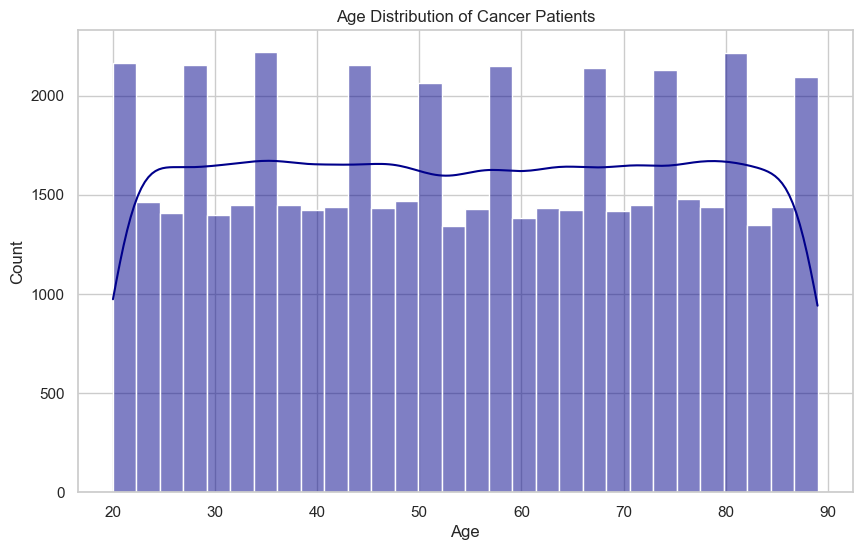

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],bins=30,kde=True,color='darkblue')
plt.title('Age Distribution of Cancer Patients')
eda_figures.append(plt.gcf())

# Gender Distribution over the years

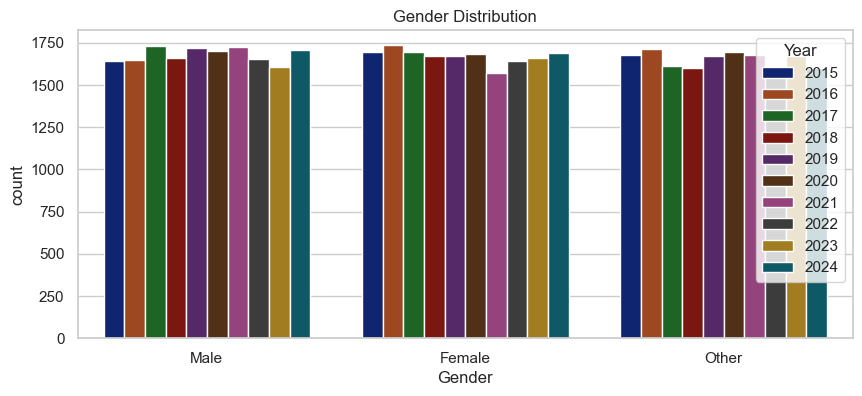

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Gender',palette='dark',hue='Year')
plt.title('Gender Distribution')
eda_figures.append(plt.gcf())

# Country Wise Patients Counts

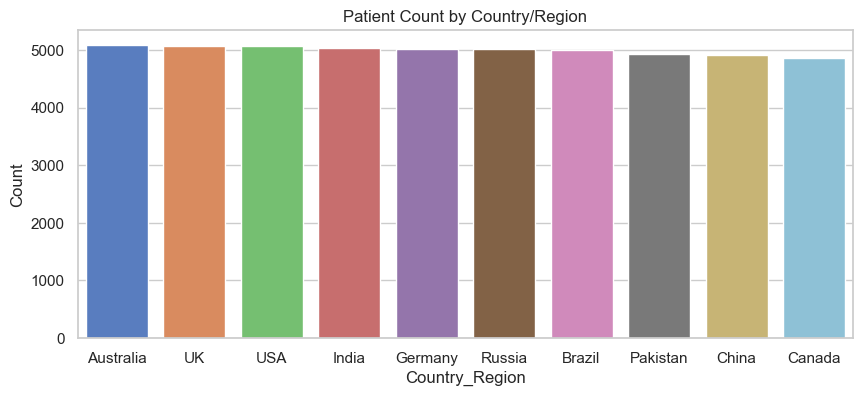

In [25]:
plt.figure(figsize=(10, 4))
top_countries = df['Country_Region'].value_counts().reset_index()
top_countries.columns = ['Country_Region', 'Count']

sns.barplot(
    data=top_countries,
    x='Country_Region',
    y='Count',
    hue='Country_Region',
    palette='muted',
    legend=False
)
plt.title('Patient Count by Country/Region')
plt.show()


# Yearly Cancer Cases Trend

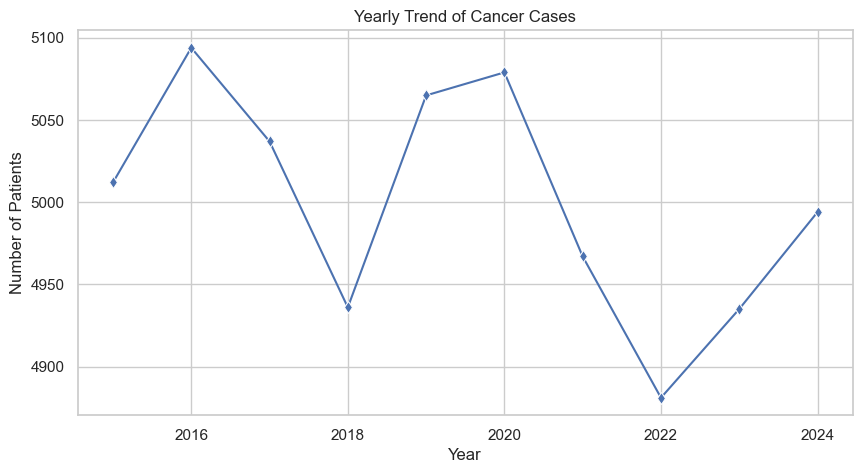

In [29]:
plt.figure(figsize=(10,5))
yearly_counts=df['Year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index,y=yearly_counts.values,marker='d')
plt.title('Yearly Trend of Cancer Cases')
plt.xlabel('Year')
plt.ylabel('Number of Patients')
eda_figures.append(plt.gcf())

#  Most Common Cancer Types

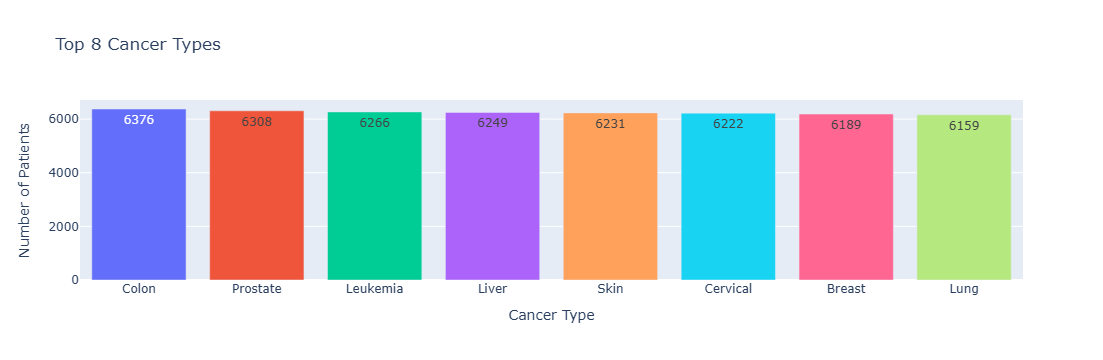

In [32]:

top_cancer_types = df['Cancer_Type'].value_counts().head(10).reset_index()
top_cancer_types.columns = ['Cancer_Type', 'Count']

fig = px.bar(
    top_cancer_types,
    x='Cancer_Type',
    y='Count',
    title='Top 8 Cancer Types',
    color='Cancer_Type',
    text='Count'
)

fig.update_layout(
    xaxis_title='Cancer Type',
    yaxis_title='Number of Patients',
    showlegend=False
)

fig.show()


# Cancer Stage Distribution

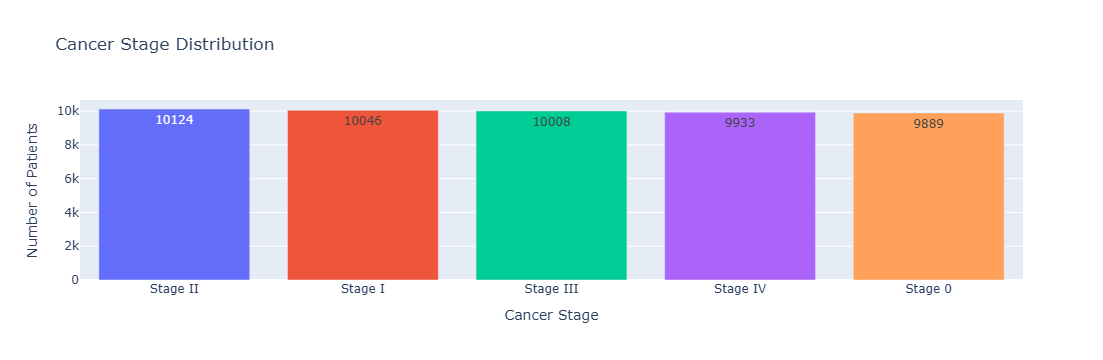

In [35]:

cancer_stage_counts = df['Cancer_Stage'].value_counts().reset_index()
cancer_stage_counts.columns = ['Cancer_Stage', 'Count']

fig = px.bar(
    cancer_stage_counts,
    x='Cancer_Stage',
    y='Count',
    color='Cancer_Stage',
    title='Cancer Stage Distribution',
    text='Count')
fig.update_layout(
    xaxis_title='Cancer Stage',
    yaxis_title='Number of Patients',
    showlegend=False)
fig.show()


TypeError: 'str' object is not callable

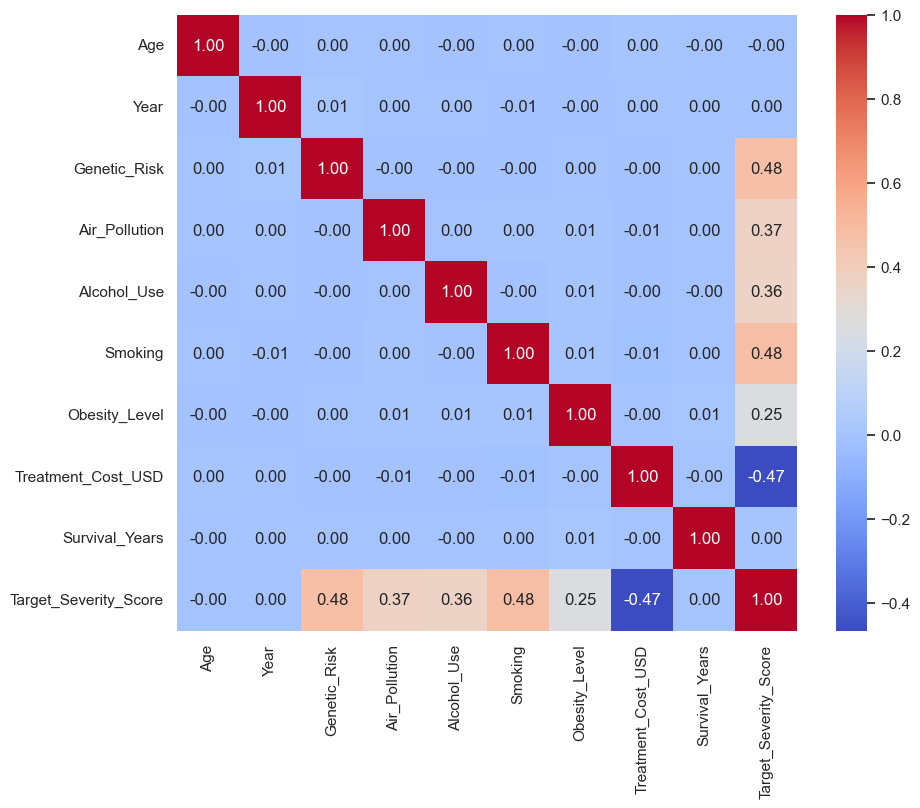

In [36]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
eda_figures.append(plt.gcf())
